In [64]:
import pandas as pd
import matplotlib.pyplot as plt
# columns: Measurement date,Dose strength,Rain

lodz_df = pd.read_csv("data/lodz.csv")
gdynia_df = pd.read_csv("data/gdynia.csv")
krakow_df = pd.read_csv("data/krakow.csv")
warszawa_df = pd.read_csv("data/warszawa.csv")
lublin_df = pd.read_csv("data/lublin.csv")

In [65]:
lodz_df['Measurement date'] = pd.to_datetime(lodz_df['Measurement date'])

In [66]:
# specific_day = '2014-02-02'
# lodz_rain = lodz_df[lodz_df['Measurement date'].dt.date == pd.to_datetime(specific_day).date()].copy()
lodz_rain = lodz_df.copy()

# Create a new column 'Rain_Above_3' with initial False values
lodz_rain['Rain_Above_3'] = lodz_rain['Rain'] > 3

# Extend the True values to neighboring rows
lodz_rain['Rain_Above_3'] = lodz_rain['Rain_Above_3'] | lodz_rain['Rain_Above_3'].shift(1, fill_value=False) | lodz_rain['Rain_Above_3'].shift(-1, fill_value=False)

# Plotting
# plt.figure(figsize=(10, 6))

# # Plot all Rain values
# plt.plot(lodz_rain['Measurement date'], lodz_rain['Rain'], marker='o', linestyle='-', label='All Rain')

# # Highlight Rain values greater than 3 and their neighbors
# highlighted_df = lodz_rain[lodz_rain['Rain_Above_3']]
# plt.plot(highlighted_df['Measurement date'], highlighted_df['Rain'], marker='o', linestyle='-', color='red', label='Rain > 3 or Neighbor')

# # Add horizontal line at Rain = 3
# plt.axhline(y=3, color='gray', linestyle='--', label='Rain = 3')

# plt.xlabel('Time')
# plt.ylabel('Rain')
# # plt.title(f'Rain Levels (Lodz - {specific_day})')
# plt.grid(True)
# plt.legend()
# plt.show()

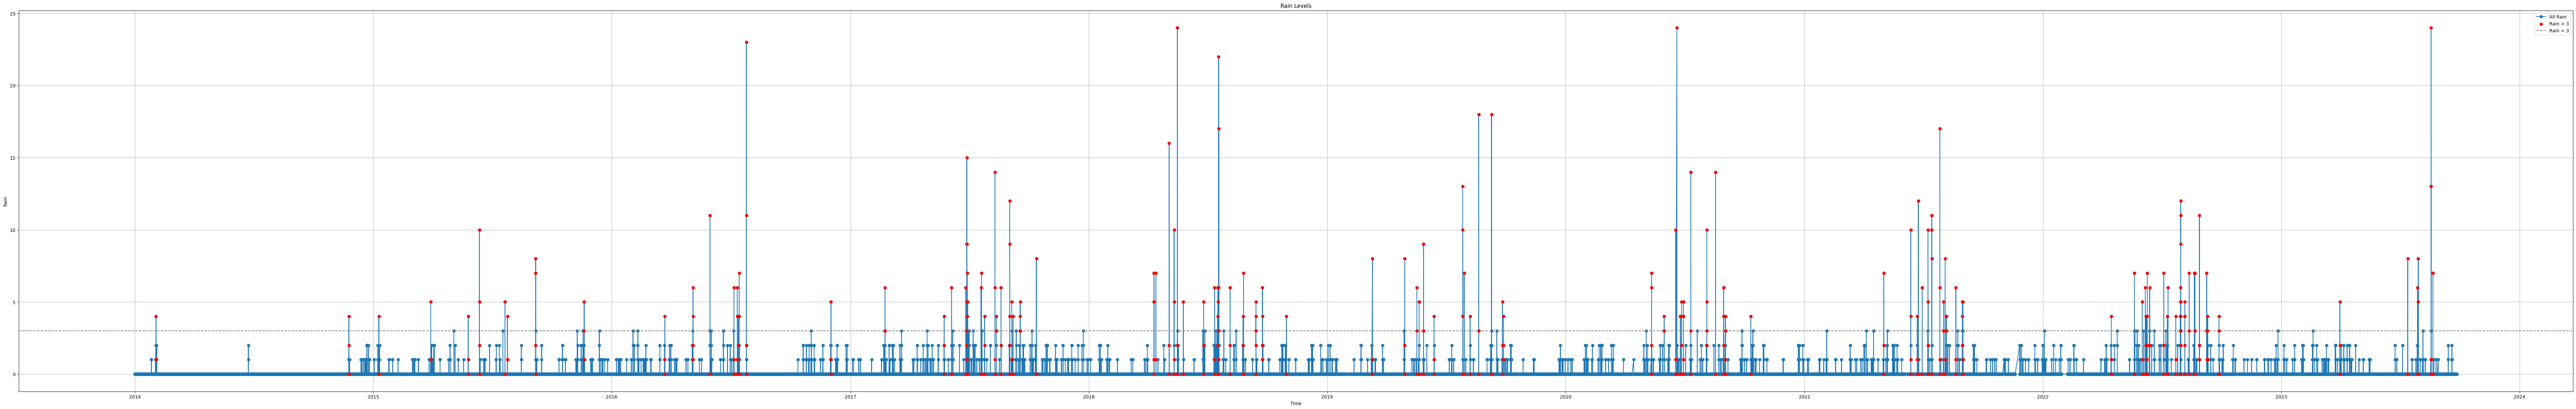

In [67]:
# Tworzenie wykresu
plt.figure(figsize=(100, 15))

# Wykres wszystkich wartości Rain
plt.plot(lodz_rain['Measurement date'], lodz_rain['Rain'], marker='o', linestyle='-', label='All Rain')

# Zaznaczenie wartości True jako czerwone punkty na wykresie
true_values = lodz_rain[lodz_rain['Rain_Above_3']]
plt.scatter(true_values['Measurement date'], true_values['Rain'], color='red', label='Rain > 3', zorder=5)

# Dodanie poziomej linii dla Rain = 3 (przerywana)
plt.axhline(y=3, color='gray', linestyle='--', label='Rain = 3')

plt.xlabel('Time')
plt.ylabel('Rain')
plt.title('Rain Levels')
plt.grid(True)
plt.legend()
plt.show()

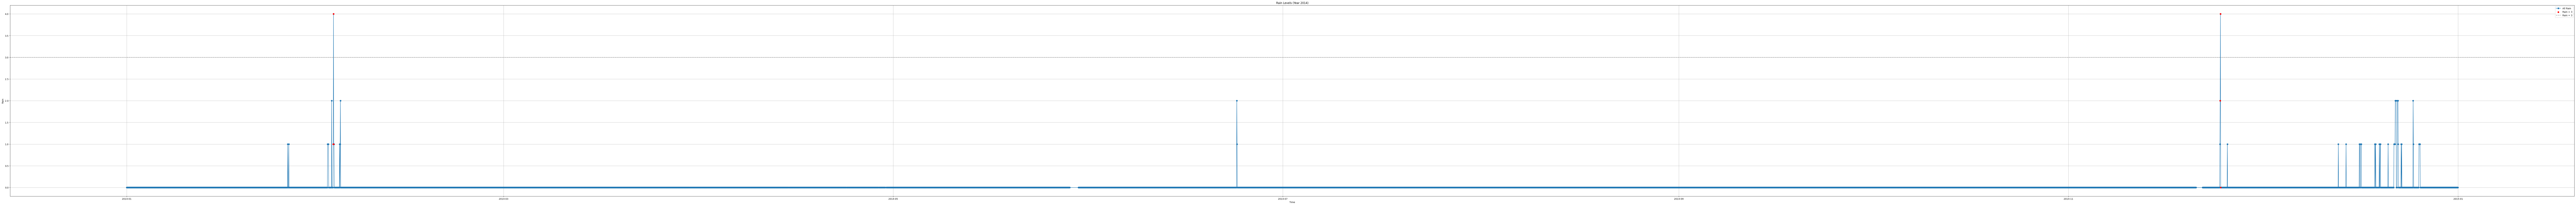

In [68]:
# Filtracja danych dla roku 2014
lodz_rain_2014 = lodz_rain[lodz_rain['Measurement date'].dt.year == 2014]

# Tworzenie wykresu
plt.figure(figsize=(200, 15))

# Wykres wszystkich wartości Rain dla roku 2014
plt.plot(lodz_rain_2014['Measurement date'], lodz_rain_2014['Rain'], marker='o', linestyle='-', label='All Rain')

# Zaznaczenie wartości True jako czerwone punkty na wykresie
true_values = lodz_rain_2014[lodz_rain_2014['Rain_Above_3']]
plt.scatter(true_values['Measurement date'], true_values['Rain'], color='red', label='Rain > 3', zorder=5)

# Dodanie poziomej linii dla Rain = 3 (przerywana)
plt.axhline(y=3, color='gray', linestyle='--', label='Rain = 3')

plt.xlabel('Time')
plt.ylabel('Rain')
plt.title('Rain Levels (Year 2014)')
plt.grid(True)
plt.legend()
plt.show()

In [69]:
slide_df = pd.read_csv("data/slide.csv")

In [70]:
slide_df['Measurement date'] = pd.to_datetime(slide_df['Measurement date'])

# Ustawienie 'Measurement date' jako indeks
slide_df.set_index('Measurement date', inplace=True)

# Obliczenie średniej dla Dose strength w okresie 12 godzin
mean_12h = slide_df['Dose strength'].resample('12h').mean()

# Dodanie nowej kolumny 'mean_12' do oryginalnego DataFrame slide_df
slide_df['mean_12'] = slide_df.index.map(lambda x: mean_12h.loc[x.floor('12h')])

slide_df['Above_15_percent_mean_12h'] = False
slide_df['Above_5_percent_mean_12h'] = False


# Sprawdzenie warunku i ustawienie wartości True
for index, row in slide_df.iterrows():
    value = slide_df.loc[index.floor('12h'), 'mean_12']
    if row['Dose strength'] > 1.15 * value:
        slide_df.at[index, 'Above_15_percent_mean_12h'] = True
    if row['Dose strength'] > 1.05 * value:
        slide_df.at[index, 'Above_5_percent_mean_12h'] = True
        
# Dodanie kolumny slide_does i ustawienie początkowej wartości na False
slide_df['slide_does'] = False
# # Inicjowanie kolumny 'slide_dose' na False
# slide_df['slide_dose'] = False

# for i in range(1, len(slide_df)):
#     if slide_df['Above_5_percent_mean_12h'].iloc[i - 1] == False and slide_df['Above_5_percent_mean_12h'].iloc[i] == True:
#         start_index = i

In [71]:
lodz_rain_2014.set_index('Measurement date', inplace=True)
# Obliczenie średniej dla Dose strength w okresie 12 godzin
mean_12h = lodz_rain_2014['Dose strength'].resample('12h').mean()

# Dodanie nowej kolumny 'mean_12' do oryginalnego DataFrame slide_df
lodz_rain_2014['mean_12'] = lodz_rain_2014.index.map(lambda x: mean_12h.loc[x.floor('12h')])

lodz_rain_2014['Above_15_percent_mean_12h'] = False
lodz_rain_2014['Above_5_percent_mean_12h'] = False


# Sprawdzenie warunku i ustawienie wartości True
for index, row in lodz_rain_2014.iterrows():
    value = lodz_rain_2014.loc[index.floor('12h'), 'mean_12']
    if row['Dose strength'] > 1.15 * value:
        lodz_rain_2014.at[index, 'Above_15_percent_mean_12h'] = True
    if row['Dose strength'] > 1.05 * value:
        lodz_rain_2014.at[index, 'Above_5_percent_mean_12h'] = True
        
lodz_rain_2014['slide_dose'] = False

# Iteracja przez kolumnę 'Above_5_percent_mean_12h' i ustawianie 'slide_dose' na True
start = 0
for i in range(1, len(lodz_rain_2014)):
    if start:
        if lodz_rain_2014['Above_5_percent_mean_12h'].iloc[i - 1] == True and lodz_rain_2014['Above_5_percent_mean_12h'].iloc[i] == False:
            end_index = lodz_rain_2014.index[i - 1]
            start = 0
            if lodz_rain_2014.loc[start_index:end_index, 'Above_15_percent_mean_12h'].any():
                lodz_rain_2014.loc[start_index:end_index, 'slide_dose'] = True
    if not start:
        if lodz_rain_2014['Above_5_percent_mean_12h'].iloc[i - 1] == False and lodz_rain_2014['Above_5_percent_mean_12h'].iloc[i] == True:
            # Szukamy, czy w tym 12-godzinnym przedziale czasowym jest chociaż jedno True w 'Above_15_percent_mean_12h'
            start_index = lodz_rain_2014.index[i]
            start = 1
            

C:\Users\matil\AppData\Local\Temp\ipykernel_6168\2801561551.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lodz_rain_2014['mean_12'] = lodz_rain_2014.index.map(lambda x: mean_12h.loc[x.floor('12h')])
C:\Users\matil\AppData\Local\Temp\ipykernel_6168\2801561551.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lodz_rain_2014['Above_15_percent_mean_12h'] = False
C:\Users\matil\AppData\Local\Temp\ipykernel_6168\2801561551.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [72]:
gdynia_df['Measurement date'] = pd.to_datetime(gdynia_df['Measurement date'])
gdynia_rain = gdynia_df.copy()
# Create a new column 'Rain_Above_3' with initial False values
gdynia_rain['Rain_Above_3'] = gdynia_rain['Rain'] > 3
# Extend the True values to neighboring rows
gdynia_rain['Rain_Above_3'] = gdynia_rain['Rain_Above_3'] | gdynia_rain['Rain_Above_3'].shift(1, fill_value=False) | gdynia_rain['Rain_Above_3'].shift(-1, fill_value=False)

krakow_df['Measurement date'] = pd.to_datetime(krakow_df['Measurement date'])
krakow_rain = krakow_df.copy()
# Create a new column 'Rain_Above_3' with initial False values
krakow_rain['Rain_Above_3'] = krakow_rain['Rain'] > 3
# Extend the True values to neighboring rows
krakow_rain['Rain_Above_3'] = krakow_rain['Rain_Above_3'] | krakow_rain['Rain_Above_3'].shift(1, fill_value=False) | krakow_rain['Rain_Above_3'].shift(-1, fill_value=False)

warszawa_df['Measurement date'] = pd.to_datetime(warszawa_df['Measurement date'])
warszawa_rain = warszawa_df.copy()
# Create a new column 'Rain_Above_3' with initial False values
warszawa_rain['Rain_Above_3'] = warszawa_rain['Rain'] > 3
# Extend the True values to neighboring rows
warszawa_rain['Rain_Above_3'] = warszawa_rain['Rain_Above_3'] | warszawa_rain['Rain_Above_3'].shift(1, fill_value=False) | warszawa_rain['Rain_Above_3'].shift(-1, fill_value=False)



In [73]:
gdynia_rain.set_index('Measurement date', inplace=True)
# Obliczenie średniej dla Dose strength w okresie 12 godzin
mean_12h = gdynia_rain['Dose strength'].resample('12h').mean()

# Dodanie nowej kolumny 'mean_12' do oryginalnego DataFrame slide_df
gdynia_rain['mean_12'] = gdynia_rain.index.map(lambda x: mean_12h.loc[x.floor('12h')])

gdynia_rain['Above_15_percent_mean_12h'] = False
gdynia_rain['Above_5_percent_mean_12h'] = False


# Sprawdzenie warunku i ustawienie wartości True
for index, row in gdynia_rain.iterrows():
    value = gdynia_rain.loc[index.floor('12h'), 'mean_12']
    if row['Dose strength'] > 1.15 * value:
        gdynia_rain.at[index, 'Above_15_percent_mean_12h'] = True
    if row['Dose strength'] > 1.05 * value:
        gdynia_rain.at[index, 'Above_5_percent_mean_12h'] = True
        
gdynia_rain['slide_dose'] = False

# Iteracja przez kolumnę 'Above_5_percent_mean_12h' i ustawianie 'slide_dose' na True
start = 0
for i in range(1, len(gdynia_rain)):
    if start:
        if gdynia_rain['Above_5_percent_mean_12h'].iloc[i - 1] == True and gdynia_rain['Above_5_percent_mean_12h'].iloc[i] == False:
            end_index = gdynia_rain.index[i - 1]
            start = 0
            if gdynia_rain.loc[start_index:end_index, 'Above_15_percent_mean_12h'].any():
                gdynia_rain.loc[start_index:end_index, 'slide_dose'] = True
    if not start:
        if gdynia_rain['Above_5_percent_mean_12h'].iloc[i - 1] == False and gdynia_rain['Above_5_percent_mean_12h'].iloc[i] == True:
            # Szukamy, czy w tym 12-godzinnym przedziale czasowym jest chociaż jedno True w 'Above_15_percent_mean_12h'
            start_index = gdynia_rain.index[i]
            start = 1
            

KeyError: Timestamp('2014-10-29 12:00:00')

In [ ]:
krakow_rain.set_index('Measurement date', inplace=True)
# Obliczenie średniej dla Dose strength w okresie 12 godzin
mean_12h = krakow_rain['Dose strength'].resample('12h').mean()

# Dodanie nowej kolumny 'mean_12' do oryginalnego DataFrame slide_df
krakow_rain['mean_12'] = krakow_rain.index.map(lambda x: mean_12h.loc[x.floor('12h')])

krakow_rain['Above_15_percent_mean_12h'] = False
krakow_rain['Above_5_percent_mean_12h'] = False


# Sprawdzenie warunku i ustawienie wartości True
for index, row in krakow_rain.iterrows():
    value = krakow_rain.loc[index.floor('12h'), 'mean_12']
    if row['Dose strength'] > 1.15 * value:
        krakow_rain.at[index, 'Above_15_percent_mean_12h'] = True
    if row['Dose strength'] > 1.05 * value:
        krakow_rain.at[index, 'Above_5_percent_mean_12h'] = True
        
krakow_rain['slide_dose'] = False

# Iteracja przez kolumnę 'Above_5_percent_mean_12h' i ustawianie 'slide_dose' na True
start = 0
for i in range(1, len(krakow_rain)):
    if start:
        if krakow_rain['Above_5_percent_mean_12h'].iloc[i - 1] == True and krakow_rain['Above_5_percent_mean_12h'].iloc[i] == False:
            end_index = krakow_rain.index[i - 1]
            start = 0
            if krakow_rain.loc[start_index:end_index, 'Above_15_percent_mean_12h'].any():
                krakow_rain.loc[start_index:end_index, 'slide_dose'] = True
    if not start:
        if krakow_rain['Above_5_percent_mean_12h'].iloc[i - 1] == False and krakow_rain['Above_5_percent_mean_12h'].iloc[i] == True:
            # Szukamy, czy w tym 12-godzinnym przedziale czasowym jest chociaż jedno True w 'Above_15_percent_mean_12h'
            start_index = krakow_rain.index[i]
            start = 1
            

In [ ]:
warszawa_rain.set_index('Measurement date', inplace=True)
# Obliczenie średniej dla Dose strength w okresie 12 godzin
mean_12h = warszawa_rain['Dose strength'].resample('12h').mean()

# Dodanie nowej kolumny 'mean_12' do oryginalnego DataFrame slide_df
warszawa_rain['mean_12'] = warszawa_rain.index.map(lambda x: mean_12h.loc[x.floor('12h')])

warszawa_rain['Above_15_percent_mean_12h'] = False
warszawa_rain['Above_5_percent_mean_12h'] = False


# Sprawdzenie warunku i ustawienie wartości True
for index, row in warszawa_rain.iterrows():
    value = warszawa_rain.loc[index.floor('12h'), 'mean_12']
    if row['Dose strength'] > 1.15 * value:
        warszawa_rain.at[index, 'Above_15_percent_mean_12h'] = True
    if row['Dose strength'] > 1.05 * value:
        warszawa_rain.at[index, 'Above_5_percent_mean_12h'] = True
        
warszawa_rain['slide_dose'] = False

# Iteracja przez kolumnę 'Above_5_percent_mean_12h' i ustawianie 'slide_dose' na True
start = 0
for i in range(1, len(warszawa_rain)):
    if start:
        if warszawa_rain['Above_5_percent_mean_12h'].iloc[i - 1] == True and warszawa_rain['Above_5_percent_mean_12h'].iloc[i] == False:
            end_index = warszawa_rain.index[i - 1]
            start = 0
            if warszawa_rain.loc[start_index:end_index, 'Above_15_percent_mean_12h'].any():
                warszawa_rain.loc[start_index:end_index, 'slide_dose'] = True
    if not start:
        if warszawa_rain['Above_5_percent_mean_12h'].iloc[i - 1] == False and warszawa_rain['Above_5_percent_mean_12h'].iloc[i] == True:
            # Szukamy, czy w tym 12-godzinnym przedziale czasowym jest chociaż jedno True w 'Above_15_percent_mean_12h'
            start_index = warszawa_rain.index[i]
            start = 1
            